In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer,Normalizer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
import statsmodels.formula.api as smf
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from mlxtend.plotting import plot_learning_curves

from sklearn.linear_model import LinearRegression
import plotly.express as px
from matplotlib.cbook import boxplot_stats
import selenium
import folium
from folium.plugins import FastMarkerCluster
import re

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

ƒê·∫∑t file Complete_dataset.csv ·ªü ngo√†i folder ch·ª©a file code ƒë·ªÉ ch∆∞∆°ng tr√¨nh c√≥ th·ªÉ b·∫Øt ƒë∆∞·ª£c ƒë∆∞·ªùng d·∫´n.

In [2]:
# Get local path of data
path = os.path.abspath(os.getcwd())
path = os.path.abspath(os.path.join(path, os.pardir)) + '\\Complete_dataset.csv'
path

'c:\\Users\\HP\\Desktop\\Data Analyst\\Projects\\Complete_dataset.csv'

In [3]:
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15300\2818732549.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df2 = df.copy()

In [5]:
df2

id   latitude  longitude  \
0        4008728  52.365237   4.878250   
1        7778612  52.367309   4.873841   
2        8264596  52.361944   4.866687   
3        2180729  52.370146   4.866282   
4       14463171  52.368818   4.871249   
...          ...        ...        ...   
494949   1150181  52.418233  13.724484   
494950   8699527  52.528116  13.461938   
494951  16881873  52.523728  13.474913   
494952  18046299  52.496994  13.497096   
494953  14878503  52.499444  13.510699   

                                                     name   host_id  \
0                     Luxurious 3 bedroom, centrum, 180m2  20786453   
1                         Luxury apartment in city centre  11964927   
2                        Cosy apartment across Vondelpark  23669273   
3                        Spacious City Apartment Oud-West   9238680   
4                  Cosy Studio Apartment Center Amsterdam  89112644   
...                                                   ...       ...   
494949                  rlaub im gr√ºnen Umland von Berlin   6304086   
494950   Big bright room in a good location for tavellers   2989041   
494951                                      Room for rent  91183137   
494952  Privatzimmer in gr√ºnen und ruhigen herzen Berlins  33062083   
494953                 *Ruhiges, modernes kleines Zimmer*  54015623   

        host_name  host_response_time  host_response_rate       city  \
0          Lithal        within a day                50.0  Amsterdam   
1            Hein  within a few hours               100.0  Amsterdam   
2        Matthieu                 NaN                 NaN  Amsterdam   
3             Bas        within a day               100.0  Amsterdam   
4           Pablo        within a day               100.0  Amsterdam   
...           ...                 ...                 ...        ...   
494949  Mechthild                 NaN                 NaN     Berlin   
494950     Nikita      within an hour               100.0     Berlin   
494951   Muhammad        within a day               100.0     Berlin   
494952      Jonas      within an hour               100.0     Berlin   
494953    Kathrin  within a few hours               100.0     Berlin   

            country  ... maximum_nights number_of_reviews reviews_per_month  \
0       Netherlands  ...         1125.0              31.0              1.52   
1       Netherlands  ...         1125.0              15.0              0.81   
2       Netherlands  ...         1125.0               1.0              0.05   
3       Netherlands  ...           30.0              22.0              0.62   
4       Netherlands  ...         1125.0              16.0              2.04   
...             ...  ...            ...               ...               ...   
494949      Germany  ...            5.0               0.0               NaN   
494950      Germany  ...         1125.0               6.0              0.54   
494951      Germany  ...         1125.0               1.0              0.35   
494952      Germany  ...         1125.0               2.0              2.00   
494953      Germany  ...         1125.0               2.0              0.32   

       review_scores_value  review_scores_cleanliness  review_scores_accuracy  \
0                      9.0                        8.0                     9.0   
1                      9.0                        9.0                     9.0   
2                     10.0                       10.0                    10.0   
3                      9.0                        9.0                    10.0   
4                      9.0                        8.0                     8.0   
...                    ...                        ...                     ...   
494949                 NaN                        NaN                     NaN   
494950                 9.0                        9.0                    10.0   
494951                 8.0                       10.0                    10.0   
494952                10.0    

Ngo√†i c√°c ƒë·ªãa ƒëi·ªÉm quen thu·ªôc v√† ƒëa d·∫°ng nh∆∞ kh√°ch s·∫°n, khu ngh·ªâ d∆∞·ª°ng, homestay,‚Ä¶ th√¨ b·∫°n c√≥ th·ªÉ l·ª±a ch·ªçn d·ªãch v·ª• l∆∞u tr√∫ Airbnb cho chuy·∫øn du l·ªãch c·ªßa m√¨nh. Tuy c√≤n kh√° m·ªõi m·∫ª nh∆∞ng ƒë√£ ·∫£nh h∆∞·ªüng kh√¥ng √≠t ƒë·∫øn th·ªã ph·∫ßn c·ªßa c√°c doanh nghi·ªáp c√πng lƒ©nh v·ª±c. B·∫°n nh·∫•t ƒë·ªãnh s·∫Ω c√≥ nh·ªØng tr·∫£i nghi·ªám ƒë·ªôc ƒë√°o v√† c·ª±c k·ª≥ th√∫ v·ªã v·ªõi d·ªãch v·ª• l∆∞u tr√∫ r·∫ª h∆°n nh∆∞ homestay, kh√°ch s·∫°n b√¨nh d√¢n ‚Ä¶

AIRBNB l√† c·ª•m t·ª´ vi·∫øt t·∫Øt t·ª´ Airbed and Breakfast (nh·∫±m ch·ªâ vi·ªác ngo√†i c√≥ ch·ªó ng·∫£ l∆∞ng v√† c√≤n ƒë∆∞·ª£c ph·ª•c v·ª• b·ªØa s√°ng mi·ªÖn ph√≠). ƒê√¢y l√† m·ªôt d·ªãch v·ª• di ƒë·ªông nh·∫±m k·∫øt n·ªëi ng∆∞·ªùi c·∫ßn thu√™ nh√†, ch·ªó ·ªü v·ªõi nh·ªØng ng∆∞·ªùi c√≥ nhu c·∫ßu cho thu√™ nh√† v√† ch·ªó ·ªü. Ng∆∞·ªùi c·∫ßn thu√™ ch·ªâ c·∫ßn nh·∫≠p n∆°i mong mu·ªën, x√°c nh·∫≠n th√¨ ƒë·ªãa ch·ªâ c·ªßa cƒÉn h·ªô s·∫Ω ƒë∆∞·ª£c g·ª≠i ƒë·∫øn. T·∫•t c·∫£ vi·ªác thanh to√°n s·∫Ω ƒë∆∞·ª£c th√¥ng qua ·ª©ng d·ª•ng n√†y v√† n√≥ s·∫Ω thu kho·∫£n ph√≠ trung gian v·ªõi c·∫£ ng∆∞·ªùi thu√™ v√† ng∆∞·ªùi cho thu√™. Airbnb c√≤n ƒë∆∞·ª£c v√≠ von vui l√† Uber c·ªßa ng√†nh kh√°ch s·∫°n.

Data source: https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features

In [6]:
nan_list = df2.isna().sum().to_numpy()
nan_idx = []
for i in range(len(nan_list)):
  if nan_list[i] > 0:
    tmp = []
    tmp.append(df2.keys()[i])
    tmp.append(df2[df2.keys()[i]].dtypes)
    tmp.append(nan_list[i])
    tmp.append(round(nan_list[i]/df2.shape[0] *100,2))
    nan_idx.append(tmp)
df3 = pd.DataFrame(nan_idx, columns = ["col_name","type","nan_amount","%"])
df3

col_name     type  nan_amount      %
0                         latitude  float64           1   0.00
1                        longitude  float64           1   0.00
2                             name   object         418   0.08
3                        host_name   object         504   0.10
4               host_response_time   object      115069  23.25
5               host_response_rate  float64      115070  23.25
6                             city   object         454   0.09
7                          country   object           3   0.00
8                    property_type   object          11   0.00
9                        room_type   object           1   0.00
10                        bed_type   object           1   0.00
11          neighbourhood_cleansed   object           1   0.00
12                    accommodates  float64          63   0.01
13                       bathrooms  float64        1526   0.31
14                        bedrooms  float64         626   0.13
15                            beds  float64         917   0.19
16                    extra_people  float64          37   0.01
17                           price  float64        7958   1.61
18                    cleaning_fee  float64      179239  36.21
19             cancellation_policy   object           2   0.00
20                  minimum_nights  float64           2   0.00
21                  maximum_nights  float64           2   0.00
22               number_of_reviews  float64           2   0.00
23               reviews_per_month  float64      122007  24.65
24             review_scores_value  float64      129081  26.08
25       review_scores_cleanliness  float64      128475  25.96
26          review_scores_accuracy  float64      128717  26.01
27  calculated_host_listings_count  float64         867   0.18
28                       amenities   object        4488   0.91
29                        features   object         306   0.06

## Data Preprosessing

D·ª±a v√†o df3, ta c√≥ th·ªÉ th·∫•y c√°c c·ªôt nh∆∞ accommodates, bathrooms, bedrooms,... c√≥ s·ªë l∆∞·ª£ng nan kh√° √≠t n√™n ta c√≥ th·ªÉ c√¢n nh·∫Øc b·ªè c√°c d√≤ng c√≥ ch·ª©a nan ·ªü c√°c c·ªôt n√†y.

In [7]:
df2 = df2.dropna(subset=["accommodates", "bathrooms", "bedrooms", "beds", "extra_people","property_type"])

Ngo√†i ra, khi x√≥a c√°c d√≤ng n√†y "v√¥ t√¨nh" khi·∫øn m·ªôt l∆∞·ª£ng l·ªõn nan ·ªü c√°c c·ªôt kh√°c c≈©ng bi·∫øn m·∫•t.

In [8]:
nan_list = df2.isna().sum().to_numpy()
nan_idx = []
for i in range(len(nan_list)):
  if nan_list[i] > 0:
    tmp = []
    tmp.append(df2.keys()[i])
    tmp.append(df2[df2.keys()[i]].dtypes)
    tmp.append(nan_list[i])
    tmp.append(round(nan_list[i]/df2.shape[0] *100,2))
    nan_idx.append(tmp)
df3 = pd.DataFrame(nan_idx, columns = ["col_name","type","nan_amount","%"])
df3

col_name     type  nan_amount      %
0                             name   object         413   0.08
1                        host_name   object         499   0.10
2               host_response_time   object      114351  23.22
3               host_response_rate  float64      114351  23.22
4                             city   object         450   0.09
5                          country   object           2   0.00
6                            price  float64        7915   1.61
7                     cleaning_fee  float64      177871  36.12
8                reviews_per_month  float64      121207  24.61
9              review_scores_value  float64      128244  26.04
10       review_scores_cleanliness  float64      127641  25.92
11          review_scores_accuracy  float64      127881  25.97
12  calculated_host_listings_count  float64         859   0.17
13                       amenities   object        4076   0.83
14                        features   object         296   0.06

### Ouliers Detection

ƒê·ªëi v·ªõi vi·ªác ph√°t hi·ªán c√°c outliers, ta t·∫≠p trung v√†o c·ªôt target(price) ƒë·ªÉ t√¨m ra ch√∫ng.

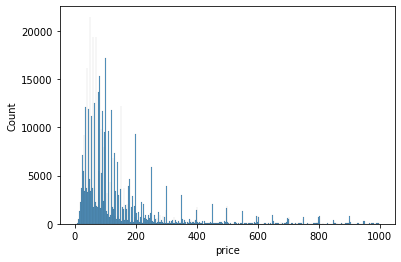

In [9]:
sns.histplot(data=df2, x="price")
plt.show()

Ta c√≥ th·ªÉ th·∫•y d·ªØ li·ªáu ch·ªß y·∫øu b·ªã skew v·ªÅ b√™n ph·∫£i v√¨ m·ªôt l∆∞·ª£ng l·ªõn ·∫£nh h∆∞·ªüng c·ªßa outliers. V√≠ d·ª• c√≥ c√°c nh√† c√≥ gi√° c·∫≠n 1000.

Khi quan s√°t t·∫≠p d·ªØ li·ªáu, ta c√≥ th·ªÉ th·∫•y c√≥ 3 lo·∫°i ph√≤ng ch√≠nh l√† Entire home/apt, Private room v√† Shared room. Cho n√™n, khi ƒëi·ªÅn d·ªØ li·ªáu thi·∫øu ·ªü c·ªôt price, ta c√≥ th·ªÉ d·ª±a v√†o gi√° trung b√¨nh c·ªßa t·ª´ng lo·∫°i ph√≤ng.

In [10]:
df2[['room_type','price']].groupby(['room_type']).mean()

price
room_type                  
Entire home/apt  173.512915
Private room      79.090951
Shared room       60.355714

In [11]:
df2['price'] = df2.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

C:\Users\HP\AppData\Local\Temp\ipykernel_15300\3992942369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))


Ti·∫øp theo, ta x·ª≠ l√Ω c√°c outlier ƒë·ªÉ c√¢n b·∫±ng d·ªØ li·ªáu.

In [12]:
def outlier_detection(df,x):
    Q1 = x.quantile(q=0.25)
    Q3 = x.quantile(q=0.75)
    IQR = 1.5 * abs(Q1-Q3)

    Q1_boundary = Q1 - IQR
    Q3_boundary = Q3 + IQR
    del_idx = list(df.price[(df.price < Q1_boundary) | (df.price > Q3_boundary)].index)
    return del_idx

# Delete those whose price is 0
df2 = df2[df2.price != 0]
# Remove outliers
del_idx = outlier_detection(df2,df2.price)
df2 = df2.drop(del_idx)

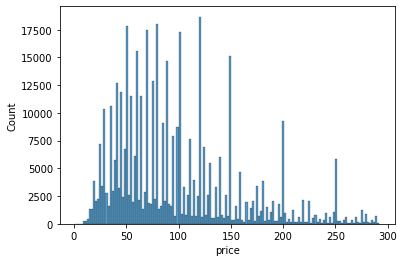

In [13]:
sns.histplot(data=df2, x="price")
plt.show()

### X·ª≠ l√Ω missing values

Khi x·ª≠ l√Ω t·∫≠p d·ªØ li·ªáu, ch√∫ng em ƒë·ªÉ √Ω th·∫•y c√°c t·∫≠p h·ª£p:

- (host_response_rate, host_response_time)
- (review_scores_cleanliness,review_scores_value,review_scores_accuracy,reviews_per_month)

In [14]:
df2['host_response_rate'] = df2['host_response_rate'].fillna(0)
df2[['host_response_time','amenities']] = df2[['host_response_time','amenities']].fillna("Not Avaialble")

In [15]:
cols = ['review_scores_cleanliness','review_scores_value','review_scores_accuracy','reviews_per_month']
df2[cols][df2['reviews_per_month'].isnull()]

review_scores_cleanliness  review_scores_value  \
12                            NaN                  NaN   
24                            NaN                  NaN   
26                            NaN                  NaN   
31                            NaN                  NaN   
34                            NaN                  NaN   
...                           ...                  ...   
494928                        NaN                  NaN   
494933                        NaN                  NaN   
494934                        NaN                  NaN   
494946                        NaN                  NaN   
494947                        NaN                  NaN   

        review_scores_accuracy  reviews_per_month  
12                         NaN                NaN  
24                         NaN                NaN  
26                         NaN                NaN  
31                         NaN                NaN  
34                         NaN                NaN  
...                        ...                ...  
494928                     NaN                NaN  
494933                     NaN                NaN  
494934                     NaN                NaN  
494946                     NaN                NaN  
494947                     NaN                NaN  

[106140 rows x 4 columns]

In [16]:
df2[cols].std()

review_scores_cleanliness    1.039317
review_scores_value          0.903184
review_scores_accuracy       0.852110
reviews_per_month            1.769312
dtype: float64

Nh·ªØng c·ªôt n√†y ƒë·ªÅu c√≥ ƒëi·ªÉm chung l√† kh√¥ng c√≥ c√°c th√¥ng s·ªë review n√™n kh√¥ng h·ª£p l√Ω khi ta x·ª≠ l√Ω c√°c Nan values n√†y m·ªôt c√°ch qu√° t√πy ti·ªán nh∆∞ thay th·∫ø b·∫±ng mod, median, mean,... V√¨ v·∫≠y, ta c√≥ th·ªÉ xem nh∆∞ c√°c ng√¥i nh√† ·ªü ƒë√¢y ch∆∞a ƒë∆∞·ª£c review trong khi thu nh·∫≠p d·ªØ li·ªáu v√† ƒëi·ªÅn c√°c missing value = 0. Trong khi nh·ªØng c·ªôt c√≤n l·∫°i ƒë·ªô l·ªách chu·∫©n kh√¥ng cao, kho·∫£ng 1.

In [17]:
mask = df2['reviews_per_month'].isna()
df2.loc[mask,cols] = 0

C√≥ ba tr∆∞·ªùng h·ª£p missing ƒë·ªëi v·ªõi nh·ªØng c·ªôt c√≥ reviews_per_month:

- C·∫£ 3 c·ªôt ƒë·ªÅu b·ªã Nan
- Hai c·ªôt b·∫•t k√¨ b·ªã Nan
- M·ªôt c·ªôt b·∫•t k√¨ b·ªã Nan

Tr∆∞·ªùng h·ª£p 1 v√† 2 ta n√™n x√≥a c√°c d√≤ng ƒë·∫•y b·ªüi v√¨ kh√¥ng ƒë·ªß d·ªØ ki·ªán ƒë·ªÉ ƒëi·ªÅn missing. ƒê·ªëi v·ªõi tr∆∞·ªùng h·ª£p 3, ta c√≥ th·ªÉ t√≠nh ƒëi·ªÉm trung b√¨nh c·ªßa 2 c·ªôt c√≤n l·∫°i.

In [18]:
df2[cols][df2['review_scores_cleanliness'].isnull() & df2['review_scores_value'].isnull() & df2['review_scores_accuracy'].isnull()]

review_scores_cleanliness  review_scores_value  \
381                           NaN                  NaN   
455                           NaN                  NaN   
502                           NaN                  NaN   
512                           NaN                  NaN   
550                           NaN                  NaN   
...                           ...                  ...   
494172                        NaN                  NaN   
494181                        NaN                  NaN   
494182                        NaN                  NaN   
494525                        NaN                  NaN   
494922                        NaN                  NaN   

        review_scores_accuracy  reviews_per_month  
381                        NaN               0.94  
455                        NaN               0.10  
502                        NaN               0.15  
512                        NaN               0.28  
550                        NaN               0.71  
...                        ...                ...  
494172                     NaN               0.14  
494181                     NaN               0.04  
494182                     NaN               0.03  
494525                     NaN               0.10  
494922                     NaN               0.15  

[5620 rows x 4 columns]

In [19]:
df2 = df2.dropna(subset=['review_scores_accuracy','review_scores_value'],how='all')
df2 = df2.dropna(subset=['review_scores_cleanliness','review_scores_value'],how='all')
df2 = df2.dropna(subset=['review_scores_accuracy','review_scores_cleanliness'],how='all')
df2 = df2.reset_index(drop=True)

In [20]:
nan_idx = list(df2[cols][df2['review_scores_accuracy'].isnull()].index)
df2[cols].iloc[nan_idx]

review_scores_cleanliness  review_scores_value  \
3012                          2.0                  2.0   
3385                         10.0                  8.0   
8284                          8.0                  6.0   
16523                         8.0                  8.0   
29596                        10.0                 10.0   
...                           ...                  ...   
406711                        8.0                 10.0   
415476                        6.0                  6.0   
420651                       10.0                 10.0   
427764                        4.0                  6.0   
434732                       10.0                 10.0   

        review_scores_accuracy  reviews_per_month  
3012                       NaN               0.48  
3385                       NaN               1.00  
8284                       NaN               0.03  
16523                      NaN               0.26  
29596                      NaN               0.12  
...                        ...                ...  
406711                     NaN               0.25  
415476                     NaN               0.11  
420651                     NaN               0.03  
427764                     NaN               0.26  
434732                     NaN               0.02  

[84 rows x 4 columns]

In [21]:
df2['review_scores_accuracy'] = df2['review_scores_accuracy'].fillna((df2['review_scores_value'] + df2['review_scores_cleanliness']) / 2)
df2['review_scores_value'] = df2['review_scores_value'].fillna((df2['review_scores_accuracy'] + df2['review_scores_cleanliness']) / 2)
df2['review_scores_cleanliness'] = df2['review_scores_cleanliness'].fillna((df2['review_scores_value'] + df2['review_scores_accuracy']) / 2)

In [22]:
df2[cols].iloc[nan_idx]

review_scores_cleanliness  review_scores_value  \
3012                          2.0                  2.0   
3385                         10.0                  8.0   
8284                          8.0                  6.0   
16523                         8.0                  8.0   
29596                        10.0                 10.0   
...                           ...                  ...   
406711                        8.0                 10.0   
415476                        6.0                  6.0   
420651                       10.0                 10.0   
427764                        4.0                  6.0   
434732                       10.0                 10.0   

        review_scores_accuracy  reviews_per_month  
3012                       2.0               0.48  
3385                       9.0               1.00  
8284                       7.0               0.03  
16523                      8.0               0.26  
29596                     10.0               0.12  
...                        ...                ...  
406711                     9.0               0.25  
415476                     6.0               0.11  
420651                    10.0               0.03  
427764                     5.0               0.26  
434732                    10.0               0.02  

[84 rows x 4 columns]

ƒê·ªëi v·ªõi c·ªôt calculated_host_listings_count, b·ªüi v√¨ ƒë√¢y l√† c·ªôt th·ªÉ hi·ªán s·ªë l∆∞·ª£ng nh√† c·ªßa m·ªôt host, ta ch·ªâ c·∫ßn groupby ch√∫ng b·∫±ng host_id r·ªìi ƒë·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa ch√∫ng ƒë·ªÉ t√¨m ra k·∫øt qu·∫£ th·ª±c.

In [23]:
df2['calculated_host_listings_count'] = df2.groupby('host_id')['host_id'].transform('count')

In [24]:
nan_list = df2.isna().sum().to_numpy()
nan_idx = []
for i in range(len(nan_list)):
  if nan_list[i] > 0:
    tmp = []
    tmp.append(df2.keys()[i])
    tmp.append(df2[df2.keys()[i]].dtypes)
    tmp.append(nan_list[i])
    tmp.append(round(nan_list[i]/df2.shape[0] *100,2))
    nan_idx.append(tmp)
df3 = pd.DataFrame(nan_idx, columns = ["col_name","type","nan_amount","%"])
df3

col_name     type  nan_amount      %
0          name   object         296   0.07
1     host_name   object         447   0.10
2          city   object         273   0.06
3       country   object           2   0.00
4  cleaning_fee  float64      158216  36.15
5      features   object         262   0.06

Sau khi x·ª≠ l√Ω missing value, ta ch·ªâ c√≤n m·ªôt s·ªë c·ªôt v√† nh·ªØng c·ªôt n√†y kh√¥ng c·∫ßn x·ª≠ l√Ω b·ªüi v√¨ khi ƒë∆∞a v√†o m√¥ h√¨nh ta s·∫Ω drop nh·ªØng c·ªôt n√†y.

## Exploratory Data Analysis

#### Ph√¢n t√≠ch top 5 th√†nh ph·ªë c√≥ nhi·ªÅu khu cho thu√™ nh·∫•t:

##### 1. Theo **property_type**

Ph√¢n t√≠ch v·ªÅ 5 th√†nh ph·ªë c√≥ nhi·ªÅu khu cho thu√™ nh·∫•t:
1. Theo property_type
2. Theo room_type

In [25]:
city_price = df2[['city']].value_counts().head(5)
city_price

city       
Paris          51950
London         44836
Berlin         19919
Roma           18001
Los Angeles    17624
dtype: int64

In [26]:
city_list = ['Paris','London','Berlin', 'Roma', 'Los Angeles']
df_city = df2[df2['city'].isin(city_list)]
df_city

id   latitude  longitude  \
469     15802051  51.481424  -0.113259   
470     14751869  51.455616  -0.122839   
471      8901485  51.501491  -0.111896   
472      5832248  51.455858  -0.113217   
473      8049784  51.424140  -0.136928   
...          ...        ...        ...   
437663   9967282  52.447320  13.617012   
437664   8699527  52.528116  13.461938   
437665  16881873  52.523728  13.474913   
437666  18046299  52.496994  13.497096   
437667  14878503  52.499444  13.510699   

                                                     name   host_id host_name  \
469                           Large double available now.  46296095     Miles   
470            Spacious 4BR home near Brixton and Clapham  11850512   Richard   
471                               quirky room with a view  12594665    Robert   
472                    Lovely 2r flat in the ‚ù§ of Brixton  30273453       Eve   
473                        Lovely bedroom in a cosy house  33670376     Meire   
...                                                   ...       ...       ...   
437663                       Luxusapartment f√ºr 1-6 G√§ste    943996    Monika   
437664   Big bright room in a good location for tavellers   2989041    Nikita   
437665                                      Room for rent  91183137  Muhammad   
437666  Privatzimmer in gr√ºnen und ruhigen herzen Berlins  33062083     Jonas   
437667                 *Ruhiges, modernes kleines Zimmer*  54015623   Kathrin   

        host_response_time  host_response_rate    city         country  ...  \
469     within a few hours               100.0  London  United Kingdom  ...   
470         within an hour               100.0  London  United Kingdom  ...   
471          Not Avaialble                 0.0  London  United Kingdom  ...   
472          Not Avaialble                 0.0  London  United Kingdom  ...   
473           within a day               100.0  London  United Kingdom  ...   
...                    ...                 ...     ...             ...  ...   
437663  within a few hours               100.0  Berlin         Germany  ...   
437664      within an hour               100.0  Berlin         Germany  ...   
437665        within a day               100.0  Berlin         Germany  ...   
437666      within an hour               100.0  Berlin         Germany  ...   
437667  within a few hours               100.0  Berlin         Germany  ...   

       maximum_nights number_of_reviews reviews_per_month review_scores_value  \
469            1125.0               3.0              0.83                10.0   
470            1125.0              21.0              3.73                10.0   
471            1125.0               0.0              0.00                 0.0   
472            1125.0               2.0              0.11                10.0   
473            1125.0               3.0              0.18                 9.0   
...               ...               ...               ...                 ...   
437663         1125.0              17.0              1.03                 9.0   
437664         1125.0               6.0              0.54                 9.0   
437665         1125.0               1.0              0.35                 8.0   
437666         1125.0               2.0              2.00                10.0   
437667         1125.0               2.0              0.32                10.0   

        review_scores_cleanliness  review_scores_accuracy  \
469                           9.0                     9.0   
470                          10.0                    10.0   
471                           0.0                     0.0   
472                          10.0                    10.0   
473                           9.0                     9.0   
...                           ...                     ...   
437663                       10.0                    10.0   
437664                        9.0                    10.0   
437665                       10.0                    10.0   

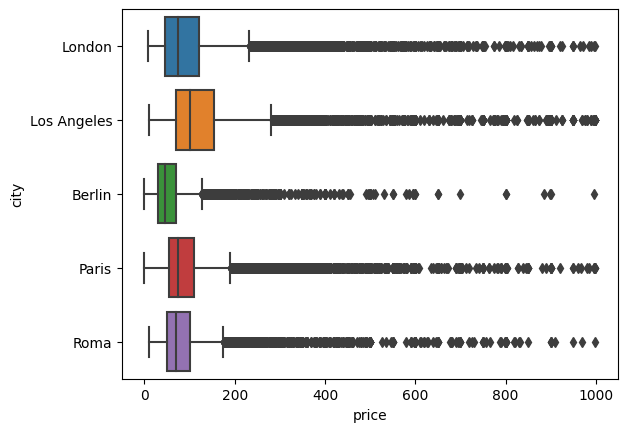

In [74]:
sns.boxplot(df_city, y='city', x='price', fliersize=5)
plt.show()

D·ª±a v√†o bi·ªÉu ƒë·ªì boxplot tr√™n c√≥ th·ªÉ th·∫•y r·∫±ng: London v√† Los Angeles c√≥ range v·ªÅ gi√° cao nh·∫•t trong 5 th√†nh ph·ªë d·∫´n t·ªõi . Trong khi ƒë√≥, Berlin c√≥ range v·ªÅ gi√° th·∫•p nh·∫•t v√† c≈©ng c√≥ th·ªÉ th·∫•y Berlin c√≥ √≠t outliner nh·∫•t trong 5 th√†nh ph·ªë. D·∫´n t·ªõi vi·ªác c√°c qu·ªëc gia c√°c range v·ªÅ gi√° c√†ng cao th√¨ c√†ng nhi·ªÅu outliner 

In [75]:
property_type_count  = df_city['property_type'].value_counts()
property_type_count = property_type_count[:10,]

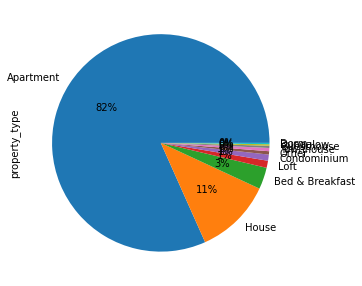

In [28]:
property_type_count.plot.pie(y=property_type_count.values, figsize=(5, 5), autopct='%1.0f%%')
plt.show()

Bi·ªÉu ƒë·ªì pie char bi·ªÉu di·ªÖn s·ª± ∆∞a chu·ªông lo·∫°i h√¨nh th·ª©c khu cho thu√™
D·ªÖ d√†ng th·∫•y r·∫±ng Apartment chi·∫øm t·ªâ l·ªá cao nh·∫•t v√† v∆∞·ª£t tr·ªôi ho√†n to√†n so v·ªõi c√°c ki·ªÉu c√≤n l·∫°i (81%). Theo sau l√† house 12%, Bed & Breakfast (3%)
Nh∆∞ v·∫≠y, Apartmen l√† h√¨nh th·ª©c khu cho thu√™ ∆∞a chu·ªông nh·∫•t b·ªüi v√¨ kh√°ch du l·ªãch h·ªç ch·ªâ c·∫ßn m·ªôt n∆°i ƒë·ªß t·ªët ƒë·ªÉ ·ªü, ng·ªß v√† d√†nh nhi·ªÅu ti·ªÅn cho vi·ªác tham quan du l·ªãch h∆°n l√† ch·ªó ·ªü. Nh·ªØng kh√°ch m√† ƒëi v·ªõi gia ƒë√¨nh hay b·∫°n b√® h·ªç th∆∞·ªùng s·∫Ω c√≥ thu√™ nguy√™n cƒÉn nh√† (House) ƒë·ªÉ c√≥ ƒë·ªß kh√¥ng gian 

In [77]:
Bi·ªÉu ƒë·ªì pie char bi·ªÉu di·ªÖn s·ª± ∆∞a chu·ªông lo·∫°i h√¨nh th·ª©c khu cho thu√™
D·ªÖ d√†ng th·∫•y r·∫±ng Apartment chi·∫øm t·ªâ l·ªá cao nh·∫•t v√† v∆∞·ª£t tr·ªôi ho√†n to√†n so v·ªõi c√°c ki·ªÉu c√≤n l·∫°i (81%). Theo sau l√† house 12%, Bed & Breakfast (3%)
Nh∆∞ v·∫≠y, Apartmen l√† h√¨nh th·ª©c khu cho thu√™ ∆∞a chu·ªông nh·∫•t b·ªüi v√¨ kh√°ch du l·ªãch h·ªç ch·ªâ c·∫ßn m·ªôt n∆°i ƒë·ªß t·ªët ƒë·ªÉ ·ªü, ng·ªß v√† d√†nh nhi·ªÅu ti·ªÅn cho vi·ªác tham quan du l·ªãch h∆°n l√† ch·ªó ·ªü. Nh·ªØng kh√°ch m√† ƒëi v·ªõi gia ƒë√¨nh hay b·∫°n b√® h·ªç th∆∞·ªùng s·∫Ω c√≥ thu√™ nguy√™n cƒÉn nh√† (House) ƒë·ªÉ c√≥ ƒë·ªß kh√¥ng gian 

##### 2. Theo **room_type**

In [29]:
roomtype_group_counts = df_city['room_type'].value_counts().rename('T·∫ßn su·∫•t')
roomtype_group_percent = df_city.groupby(['room_type'])['number_of_reviews'].sum().transform(
                                                lambda x: np.round(x/x.sum(),2)*100).rename('% L∆∞·ª£t thu√™ ph√≤ng')
Q2_df = df_city[['room_type','number_of_reviews']]
Q2_df = pd.concat([roomtype_group_counts, roomtype_group_percent], axis=1)
Q2_df

T·∫ßn su·∫•t  % L∆∞·ª£t thu√™ ph√≤ng
Entire home/apt     97980               68.0
Private room        51668               30.0
Shared room          2682                1.0

In [30]:
new_data_df = df_city.copy()

In [31]:
private_room_df = new_data_df[new_data_df['room_type'] == 'Private room']
shared_room_df = new_data_df[new_data_df['room_type'] == 'Shared room']
entire_room_df = new_data_df[new_data_df['room_type'] == 'Entire home/apt']

In [32]:
Q4_df = new_data_df[new_data_df['room_type'].isin(['Shared room','Entire home/apt', 'Private room'])]
Q4_sum = Q4_df.groupby(['city','room_type'])['price'].mean()

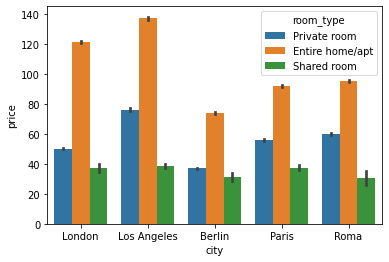

In [33]:
sns.barplot(data=Q4_df, x='city', y='price', hue='room_type')
plt.show()

Nh∆∞ ƒë√£ ƒë·ªÅ c·∫≠p ·ªü bi·ªÉu ƒë·ªì boxplot ·ªü tr√™n th√¨ London v√† Los Angeles l√† th√†nh ph·ªë c√≥ gi√° cho thu√™ cao nh·∫•t trong top 5 th√†nh ph·ªë c√≥ nhi·ªÅu khu cho thu√™ nh·∫•t. B·ªüi th·∫ø trong bi·ªÉu c·ªôt ·ªü tr√™n, gi√° cho thu√™ theo t·ª´ng lo·∫°i ph√≤ng c·ª• th·ªÉ l√† private room, entired home/apt v√† share room c·ªßa 2 th√†nh ph·ªë n√†y c≈©ng l√† cao nh·∫•t. Los Angeles l√† cao nh·∫•t, cao th·ª© 2 l√† Anh, cao th·ª© 3 l√† Roma, k·∫ø cu·ªëi l√† Paris v√† th·∫•p nh·∫•t v·∫´n l√† Berlin.

## Hi·ªáu

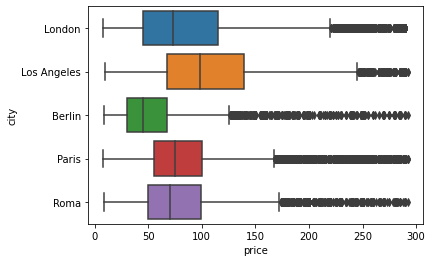

In [34]:
sns.boxplot(data=df_city, y='city', x='price', fliersize=5)
plt.show()

D·ª±a v√†o bi·ªÉu ƒë·ªì boxplot tr√™n c√≥ th·ªÉ th·∫•y r·∫±ng: London v√† Los Angeles c√≥ range v·ªÅ gi√° cao nh·∫•t trong 5 th√†nh ph·ªë d·∫´n t·ªõi . Trong khi ƒë√≥, Berlin c√≥ range v·ªÅ gi√° th·∫•p nh·∫•t.

In [35]:
outliers_dict = dict()
for species, data in df_city[['price','city']].groupby('city'):
    data = data.iloc[:, :-1]  # drop off the species column
    stats = boxplot_stats(data)
    for col, stat in zip(data.columns, stats):
        outliers = stat['fliers'].tolist()
        outliers_dict[species] = [len(outliers),min(outliers),max(outliers)]

for key in outliers_dict:
    data = outliers_dict[key]
    counts,min_outlier,max_outlier = data[0],data[1],data[2]
    print(key,"-",counts,"outliers")
    print("Range of outliers:",min_outlier,"-",max_outlier,"\n")

Berlin - 947 outliers
Range of outliers: 126.0 - 292.0 

London - 1389 outliers
Range of outliers: 221.0 - 290.0 

Los Angeles - 681 outliers
Range of outliers: 246.0 - 292.0 

Paris - 3868 outliers
Range of outliers: 168.0 - 292.0 

Roma - 969 outliers
Range of outliers: 174.0 - 292.0 



In [36]:
outlier_index = []
for key in outliers_dict:
    data = outliers_dict[key]
    counts,min_outlier,max_outlier = data[0],data[1],data[2]
    outlier_index.append(df_city[df_city.city == key][(df_city.price >= min_outlier)].index.tolist())

flat_index = [item for sublist in outlier_index for item in sublist]
df_top_city_outliers = df_city[df_city.index.isin(flat_index)]

C:\Users\HP\AppData\Local\Temp\ipykernel_15300\3194336681.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_index.append(df_city[df_city.city == key][(df_city.price >= min_outlier)].index.tolist())


In [37]:
roomtype_group_counts = df_top_city_outliers['room_type'].value_counts().rename('T·∫ßn su·∫•t')
roomtype_group_percent = df_top_city_outliers.groupby(['room_type'])['number_of_reviews'].sum().transform(
                                                lambda x: np.round(x/x.sum(),2)*100).rename('% L∆∞·ª£t thu√™ ph√≤ng')
Q2_df = df_top_city_outliers[['room_type','number_of_reviews']]
Q2_df = pd.concat([roomtype_group_counts, roomtype_group_percent], axis=1)
Q2_df

T·∫ßn su·∫•t  % L∆∞·ª£t thu√™ ph√≤ng
Entire home/apt      7535               99.0
Private room          307                1.0
Shared room            12                0.0

In [38]:
df_top_city_outliers[['host_id','host_name','city','calculated_host_listings_count']].value_counts().head(10)

host_id   host_name              city    calculated_host_listings_count
33889201  Tom                    London  422                               160
2288803   Fabien                 Paris   59                                 34
3971743   Diane                  Paris   48                                 31
12984381  Olivier                Paris   96                                 30
789620    Charlotte              Paris   35                                 30
5056483   Bettina                Paris   158                                28
                                 Roma    158                                27
23025598  My Apartment In Paris  Paris   43                                 26
152242    Delphine               Paris   53                                 26
7642792   Ludovic                Paris   49                                 25
dtype: int64

In [39]:
Long=2.3488
Lat=48.85341
locations = list(zip(df_top_city_outliers.latitude, df_top_city_outliers.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [40]:
df_host = df2[['host_id','host_name','price','calculated_host_listings_count','bathrooms','bedrooms','beds','accommodates','host_response_rate','extra_people','minimum_nights','maximum_nights','reviews_per_month','review_scores_value','review_scores_cleanliness','review_scores_accuracy','number_of_reviews']].groupby(['host_id','host_name']).mean()\
.sort_values('calculated_host_listings_count',ascending=False).head(100)
df_host

price  calculated_host_listings_count  \
host_id  host_name                                                         
3625030  Angela               124.193777                           707.0   
33889201 Tom                  204.727488                           422.0   
12243051 Sonder               140.860215                           208.0   
         Flatbook             169.921739                           208.0   
43337979 Top Villas Mallorca  157.434555                           191.0   
...                                  ...                             ...   
1408525  Mad4Rent              87.137255                            51.0   
13262085 Maria Belen          150.372549                            51.0   
7572808  Michael              175.600000                            50.0   
22348222 Alicia               152.500000                            50.0   
24194499 Juh                   32.300000                            50.0   

                              bathrooms  bedrooms      beds  accommodates  \
host_id  host_name                                                          
3625030  Angela                2.170438  3.132956  4.613861      6.526167   
33889201 Tom                   1.599526  2.208531  2.637441      4.793839   
12243051 Sonder                1.559140  1.967742  2.311828      4.526882   
         Flatbook              1.230435  1.956522  2.104348      4.739130   
43337979 Top Villas Mallorca   2.282723  3.308901  4.994764      6.895288   
...                                 ...       ...       ...           ...   
1408525  Mad4Rent              1.137255  1.137255  1.392157      3.411765   
13262085 Maria Belen           1.274510  1.431373  2.509804      4.352941   
7572808  Michael               2.410000  3.300000  6.360000      6.720000   
22348222 Alicia                1.000000  0.140000  1.040000      2.060000   
24194499 Juh                   1.020000  1.000000  1.400000      2.840000   

                              host_response_rate  extra_people  \
host_id  host_name                                               
3625030  Angela                        99.000000      2.089109   
33889201 Tom                           98.000000      0.000000   
12243051 Sonder                        99.978495      0.215054   
         Flatbook                      86.095652      6.869565   
43337979 Top Villas Mallorca           96.000000      1.638743   
...                                          ...           ...   
1408525  Mad4Rent                      94.000000      8.921569   
13262085 Maria Belen                   88.000000      2.156863   
7572808  Michael                      100.000000      2.800000   
22348222 Alicia                       100.000000      0.000000   
24194499 Juh                           95.000000     10.000000   

                              minimum_nights  maximum_nights  \
host_id  host_name                                             
3625030  Angela                     6.840170      944.223479   
33889201 Tom                        3.834123     1122.350711   
12243051 Sonder                     2.322581     1125.000000   
         Flatbook                   2.573913     1078.043478   
43337979 Top Villas Mallorca        6.984293     1125.000000   
...                                      ...             ...   
1408525  Mad4Rent                   4.137255      763.725490   
13262085 Maria Belen                2.019608      229.254902   
7572808  Michael                    7.000000     1104.500000   
22348222 Alicia                     7.000000     1125.000000   
24194499 Juh                        1.000000     1125.000000   

                              reviews_per_month  review_scores_value  \
host_id  host_name                                                     
3625030  Angela                        0.070495             3.322489   
33889201 Tom                           0.071919             1.644550   
12243051 Sonder                        1.346237             8.47

L·∫•y ra top 100 hosts ƒë·ªÉ ti·∫øn h√†nh ph√¢n t√≠ch d·ªØ li·ªáu

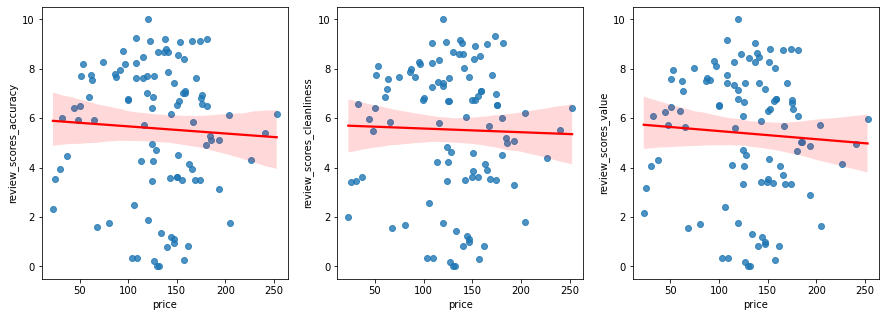

In [41]:
fig, axs = plt.subplots(figsize=(15,5),ncols=3)
sns.regplot(data=df_host, x='price', y='review_scores_accuracy', line_kws={"color": "red"}, ax=axs[0])
sns.regplot(data=df_host, x='price', y='review_scores_cleanliness', line_kws={"color": "red"}, ax=axs[1])
sns.regplot(data=df_host, x='price', y='review_scores_value', line_kws={"color": "red"}, ax=axs[2])
plt.show()

D·ª±a v√†o bi·ªÉu ƒë·ªì regplot ta th·∫•y c√°c review score kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn Gi√° thu√™ ph√≤ng (price)

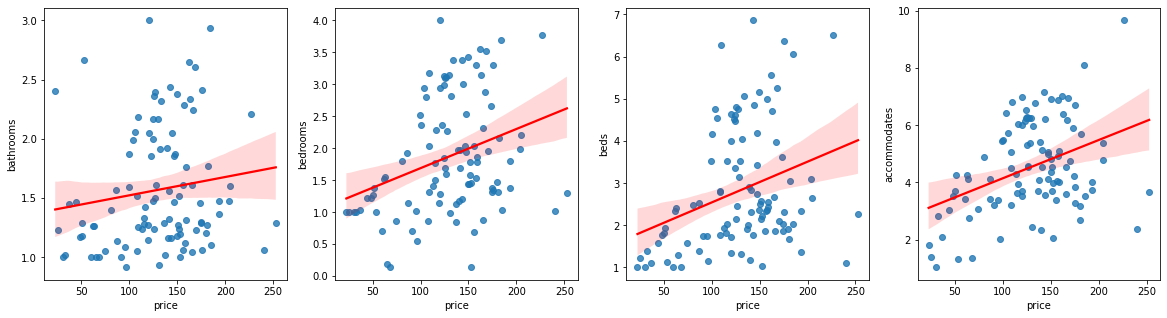

In [42]:
fig, axs = plt.subplots(figsize=(20,5),ncols=4)
sns.regplot(data=df_host, x='price', y='bathrooms', line_kws={"color": "red"}, ax=axs[0])
sns.regplot(data=df_host, x='price', y='bedrooms', line_kws={"color": "red"}, ax=axs[1])
sns.regplot(data=df_host, x='price', y='beds', line_kws={"color": "red"}, ax=axs[2])
sns.regplot(data=df_host, x='price', y='accommodates', line_kws={"color": "red"}, ax=axs[3])
plt.show()

M·∫∑t kh√°c th√¨ c√°c ti·ªán √≠ch/n·ªôi th·∫•t nh∆∞ bathrooms, bedrooms, beds, accommodates ·∫£nh h∆∞·ªüng kh√° nhi·ªÅu ƒë·∫øn Gi√° thu√™ ph√≤ng (price), c√≥ th·ªÉ th·∫•y s·ªë l∆∞·ª£ng ti·ªán √≠ch/n·ªôi th·∫•t c√†ng nhi·ªÅu th√¨ gi√° c≈©ng c√†ng cao

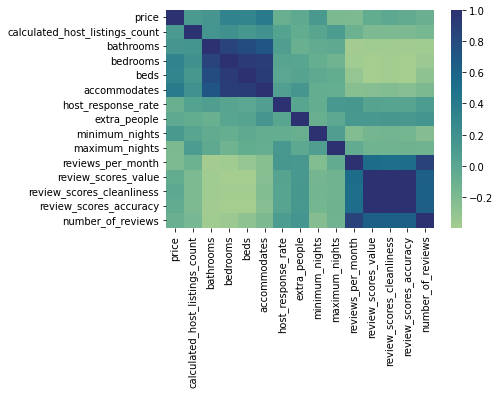

In [43]:
df_host_heatmap = df_host.corr()
sns.heatmap(df_host_heatmap, cmap='crest')
plt.show()

Nh√¨n v√†o bi·ªÉu ƒë·ªì heatmap, ta c√≥ th·ªÉ chia d·ªØ li·ªáu th√†nh 2 c·ª•m d·ªØ li·ªáu ƒë√≥ l√† ƒêi·ªÉm ƒë√°nh gi√° (review_scores_value, review_scores_cleanliness, review_scores_accuracy) v√† C√°c ti·ªán √≠ch/n·ªôi th·∫•t (bathrooms, bedrooms, beds, accommodates). Nh√¨n h√¨nh ta c√≥ th·ªÉ th·∫•y t∆∞∆°ng quan gi·ªØa 2 c·ª•m d·ªØ li·ªáu n√†y v·ªõi nhau th√¨ ch√∫ng kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn nhau (c√≥ th·ªÉ m√†u c·ªßa c√°c √¥ l√† m√†u nh·∫°t). M·∫∑t kh√°c t∆∞∆°ng quan gi·ªØa t·ª´ng ph·∫ßn t·ª≠ trong t·ª´ng c·ª•m th√¨ ch√∫ng c√≥ m·ªëi li√™n k·∫øt v·ªõi nhau r·∫•t ch·∫∑t ch·∫Ω (m√†u c·ªßa c√°c √¥ l√† m√†u ƒë·∫≠m)

In [44]:
df2 = df2[df2.room_type != '9']
df_type = df2[['property_type','room_type','price']]
df_heatmap = df_type.pivot_table(values='price',columns='property_type',index='room_type',aggfunc=np.mean )

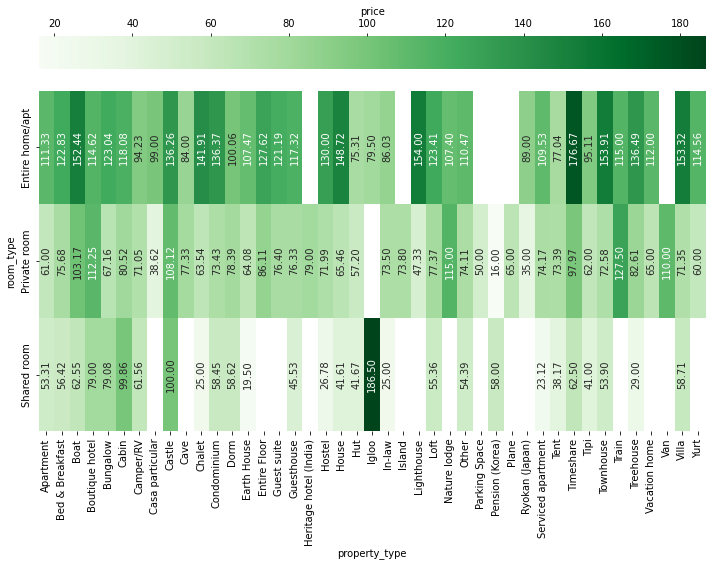

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(df_heatmap,annot=True, fmt='.2f',annot_kws={'rotation': 90},cbar=True, ax=ax, cmap='Greens', cbar_kws={'location':'top','label': 'price'})
cbar = heatmap.collections[0].colorbar
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=90, va='center')
plt.tight_layout()
plt.show()

D·ª±a v√†o heatmap th·ªÉ hi·ªán s·ª± t∆∞∆°ng quan c·ªßa t·ª´ng lo·∫°i ph√≤ng (room_type) v·ªõi t·ª´ng lo·∫°i d·ªãch v·ª• (property_type) th√¨ ta c√≥ th·ªÉ ƒë∆∞a ra ƒë∆∞·ª£c c√°c nh·∫≠n x√©t nh∆∞ sau:
- Lo·∫°i nh√† nguy√™n cƒÉn (Entire home/apt) c√≥ gi√° trung b√¨nh c·ªßa c√°c lo·∫°i d·ªãch v·ª• cao nh·∫•t (m√†u ƒë·∫≠m), sau ƒë√≥ l√† Private room v√† cu·ªëi c√πng l√† Shared room (m√†u nh·∫°t d·∫ßn). 
- Entire home/apt c√≥ c√°c ƒëi·ªÉm d·ªØ li·ªáu n·ªïi b·∫≠t l√† Island (985.00), Castle (264.88), Tent (240.84)
- Private room c√≥ c√°c ƒëi·ªÉm d·ªØ li·ªáu n·ªïi b·∫≠t l√† Igloo (302.00), Timeshare (155.51), Castle (154.47)
- Shared room c√≥ c√°c ƒëi·ªÉm d·ªØ li·ªáu n·ªïi b·∫≠t l√† Chalet (485.50), Boutique hotel (386.33), Igloo (291.00)

## Model

Tr∆∞·ªõc khi th·ª±c hi·ªán t·∫°o m√¥ h√¨nh h·ªçc m√°y, ta c·∫ßn x·ª≠ l√Ω c√°c c√¥ng ƒëo·∫°n quan tr·ªçng: lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt, encode c√°c d·ªØ li·ªáu d·∫°ng ch·ªØ,...

### Encoding Variables

Ta c·∫ßn encode c√°c c·ªôt d·∫°ng categorical sang numerical ƒë·ªÉ c√≥ th·ªÉ t·∫°o model cho d·ªØ li·ªáu

Ta s·∫Ω gi·ªØ nguy√™n 100 th√†nh ph·ªë t·∫≠p trung ƒë√¥ng c√°c nh√† ƒë∆∞·ª£c ƒëƒÉng k√Ω v√† cho c√°c th√†nh ph·ªë c√≤n l·∫°i th√†nh **Others**

In [ ]:
top_city = 100
need_city = df2['city'].value_counts().head(top_city).index.tolist()

In [ ]:
len(df2[df2['city'].isin(need_city)]) / len(df2) * 100

87.63053467000836

Ta ch·ªçn top 100 th√†nh ph·ªë ƒë√¥ng nh·∫•t b·ªüi v√¨ ch·ªâ v·ªõi 100 th√†nh ph·ªë tr√™n ƒë√£ chi·∫øm ~87% % d·ªØ li·ªáu

In [ ]:
df2.loc[~df2['city'].isin(need_city), 'city'] = 'Other'

**Spearman's rank correlation** l√† m·ªôt ki·ªÉm tra phi tham s·ªë v·ªÅ m·ª©c ƒë·ªô t∆∞∆°ng quan, s·ª©c m·∫°nh, h∆∞·ªõng li√™n k·∫øt gi·ªØa hai bi·∫øn ƒë∆∞·ª£c ƒëo l∆∞·ªùng tr√™n m·ªôt th∆∞·ªõc ƒëo nh·∫•t ƒë·ªãnh. Th∆∞·ªõc ƒëo ·ªü ƒë√¢y ta s·∫Ω l·∫•y trung b√¨nh gi√° c·ªßa t·ª´ng lo·∫°i d·ªØ li·ªáu. 

In [ ]:
numeric_cols = [f for f in df2.columns if df2.dtypes[f] != 'object']
categorical_cols = [f for f in df2.columns if df2.dtypes[f] == 'object']

del_cols = ['city','country','neighbourhood_cleansed','amenities','features']
categorical_cols = [x for x in categorical_cols if (x not in del_cols)]

In [ ]:
# Encode categorical columns with spearman's rank correlation
df4 = df2.copy()
def encode(df, feature):
    ordering = pd.DataFrame()
    ordering['val'] = df[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = df[[feature, 'price']].groupby(feature).mean()['price']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    print(feature,ordering[['spmean','ordering']])
    ordering = ordering['ordering'].to_dict()

    for cat, o in ordering.items():
        df.loc[df[feature] == cat, feature+'_E'] = o
    
encoded_cols = []
for q in categorical_cols:
    encode(df4,q)
    encoded_cols.append(q+'_E')

df4['amenities'] = df4['amenities'].transform(lambda x: x.lower().split(","))

host_response_time                        spmean  ordering
val                                    
a few days or more  82.477039         1
Not Avaialble       87.264475         2
within an hour      91.105894         3
within a day        91.114087         4
within a few hours  93.152042         5
property_type                             spmean  ordering
val                                         
Pension (Korea)          37.000000         1
Hostel                   44.223097         2
Casa particular          45.333333         3
Parking Space            50.000000         4
Dorm                     58.991142         5
Ryokan (Japan)           62.000000         6
Tent                     62.811111         7
Hut                      64.461538         8
Plane                    65.000000         9
Island                   73.800000        10
Bed & Breakfast          75.973576        11
Heritage hotel (India)   79.000000        12
Lighthouse               80.400000        13
Tipi        

ƒê·ªëi v·ªõi c√°c c·ªôt nh∆∞ city, country v√† amenities l√† ki·ªÉu d·ªØ li·ªáu d·∫°ng ph√¢n lo·∫°i, ch√∫ng c·∫ßn ƒë∆∞·ª£c th·ª±c hi·ªán encoding v·ªõi get_dummies.

In [ ]:
dummy_city = pd.get_dummies(df4.city, prefix="city")
dummy_country = pd.get_dummies(df4.country, prefix="country")
mlb = MultiLabelBinarizer()
dummy_amenities = pd.DataFrame(mlb.fit_transform(df4['amenities']),columns=mlb.classes_, index=df4.index)

In [ ]:
dummy_city

city_Alc√∫dia  city_Amsterdam  city_Antwerpen  city_Athens  \
0                  0               1               0            0   
1                  0               1               0            0   
2                  0               1               0            0   
3                  0               1               0            0   
4                  0               1               0            0   
...              ...             ...             ...          ...   
437663             0               0               0            0   
437664             0               0               0            0   
437665             0               0               0            0   
437666             0               0               0            0   
437667             0               0               0            0   

        city_Athina  city_Austin  city_Barcelona  city_Berlin  \
0                 0            0               0            0   
1                 0            0               0            0   
2                 0            0               0            0   
3                 0            0               0            0   
4                 0            0               0            0   
...             ...          ...             ...          ...   
437663            0            0               0            1   
437664            0            0               0            1   
437665            0            0               0            1   
437666            0            0               0            1   
437667            0            0               0            1   

        city_Beverly Hills  city_Bondi  ...  city_Toronto  city_Vancouver  \
0                        0           0  ...             0               0   
1                        0           0  ...             0               0   
2                        0           0  ...             0               0   
3                        0           0  ...             0               0   
4                        0           0  ...             0               0   
...                    ...         ...  ...           ...             ...   
437663                   0           0  ...             0               0   
437664                   0           0  ...             0               0   
437665                   0           0  ...             0               0   
437666                   0           0  ...             0               0   
437667                   0           0  ...             0               0   

        city_Venezia  city_Venice  city_Vienna  city_Ville de Qu√©bec  \
0                  0            0            0                     0   
1                  0            0            0                     0   
2                  0            0            0                     0   
3                  0            0            0                     0   
4                  0            0            0                     0   
...              ...          ...          ...                   ...   
437663             0            0            0                     0   
437664             0            0            0                     0   
437665             0            0            0                     0   
437666             0            0            0                     0   
437667             0            0            0                     0   

        city_Washington  city_West Hollywood  city_Wien  city_ŒëŒ∏ŒÆŒΩŒ±  
0                     0                    0          0           0  
1                     0                    0          0           0  
2                     0                    0          0           0  
3                     0                    0          0           0  
4                     0                    0          0           0  
...                 ...                  ...        ...         ...  
437663                0                    0          0           0  
437664                0                  

In [ ]:
dummy_amenities

24-hour check-in  accessible-height bed  accessible-height toilet  \
0                      1                      0                         0   
1                      0                      0                         0   
2                      0                      0                         0   
3                      0                      0                         0   
4                      0                      0                         0   
...                  ...                    ...                       ...   
437663                 0                      0                         0   
437664                 0                      0                         0   
437665                 0                      0                         0   
437666                 0                      0                         0   
437667                 0                      0                         0   

        air conditioning  baby bath  baby monitor  babysitter recommendations  \
0                      0          0             0                           0   
1                      0          0             0                           0   
2                      0          0             0                           0   
3                      0          0             0                           0   
4                      0          0             0                           0   
...                  ...        ...           ...                         ...   
437663                 0          0             0                           0   
437664                 0          0             0                           0   
437665                 0          0             0                           0   
437666                 0          0             0                           0   
437667                 0          0             0                           0   

        bathtub  bbq grill  beach essentials  ...  washer  washer / dryer  \
0             0          0                 0  ...       1               0   
1             0          0                 0  ...       1               0   
2             0          0                 0  ...       1               0   
3             0          0                 0  ...       0               0   
4             0          0                 0  ...       1               0   
...         ...        ...               ...  ...     ...             ...   
437663        0          0                 0  ...       1               0   
437664        0          0                 0  ...       1               0   
437665        0          0                 0  ...       0               0   
437666        0          0                 0  ...       1               0   
437667        0          0                 0  ...       0               0   

        waterfront  wheelchair accessible  wide clearance to bed  \
0                0                      0                      0   
1                0                      0                      0   
2                0                      0                      0   
3                0                      0                      0   
4                0                      0                      0   
...            ...                    ...                    ...   
437663           0                      0                      0   
437664           0                      0                      0   
437665           0                      0                      0   
437666           0                      0                      0   
437667           0                      0                      0   

        wide clearance to shower and toilet  wide doorway  \
0                                         0             0   
1                                         0             0   
2                                         0             0   
3                                         0             0   
4                                         0             0   
..

Cu·ªëi c√πng, ta g·ªôp c√°c c·ªôt c·∫ßn thi·∫øt ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh l·∫°i ƒë·ªÉ sang c√¥ng ƒëo·∫°n ti·∫øp theo.

In [ ]:
df5 = pd.concat([df4[encoded_cols + numeric_cols], dummy_city, dummy_country,dummy_amenities], axis=1)
df5 = df5.drop(['translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'],axis=1)

In [ ]:
df5

host_response_time_E  property_type_E  room_type_E  bed_type_E  \
0                        5.0             23.0          3.0         5.0   
1                        2.0             23.0          3.0         5.0   
2                        4.0             23.0          3.0         5.0   
3                        4.0             23.0          3.0         5.0   
4                        4.0             23.0          3.0         5.0   
...                      ...              ...          ...         ...   
437663                   5.0             23.0          3.0         5.0   
437664                   3.0             23.0          2.0         5.0   
437665                   4.0             23.0          2.0         5.0   
437666                   3.0             23.0          2.0         5.0   
437667                   5.0             23.0          2.0         5.0   

        cancellation_policy_E  host_response_rate  accommodates  bathrooms  \
0                         8.0               100.0           4.0        1.0   
1                         3.0                 0.0           4.0        1.0   
2                         3.0               100.0           4.0        1.0   
3                         6.0               100.0           2.0        1.0   
4                         8.0               100.0           2.0        1.0   
...                       ...                 ...           ...        ...   
437663                    8.0               100.0           6.0        1.0   
437664                    6.0               100.0           2.0        1.5   
437665                    3.0               100.0           1.0        1.0   
437666                    3.0               100.0           1.0        1.0   
437667                    6.0               100.0           1.0        1.0   

        bedrooms  beds  ...  washer  washer / dryer  waterfront  \
0            2.0   2.0  ...       1               0           0   
1            2.0   2.0  ...       1               0           0   
2            2.0   4.0  ...       1               0           0   
3            0.0   1.0  ...       0               0           0   
4            1.0   1.0  ...       1               0           0   
...          ...   ...  ...     ...             ...         ...   
437663       3.0   6.0  ...       1               0           0   
437664       1.0   2.0  ...       1               0           0   
437665       1.0   1.0  ...       0               0           0   
437666       1.0   1.0  ...       1               0           0   
437667       1.0   1.0  ...       0               0           0   

        wheelchair accessible  wide clearance to bed  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   
...                       ...                    ...   
437663                      0                      0   
437664                      0                      0   
437665                      0                      0   
437666                      0                      0   
437667                      0                      0   

        wide clearance to shower and toilet  wide doorway  \
0                                         0             0   
1                                         0             0   
2                                         0             0   
3                                         0             0   
4                                         0             0   
...                                     ...           ...   
437663                                    0             0   
437664                                    0             0   
437665                                    0             0   
437666                                    0             0   
437667                           

In [ ]:
from sklearn.decomposition import PCA
def PCA_process(X):
  pca_impl = PCA(n_components = 2)
  X_pca = pca_impl.fit_transform(X)
  return X_pca

### Prepare data

ƒê·∫ßu ti√™n, ta c·∫ßn ƒë·∫£m b·∫£o d·ªØ li·ªáu s·∫µn s√†ng nh∆∞ t√°ch X,y v√† ti·∫øn h√†nh scale ch√∫ng. Sau ƒë√≥ ph√¢n chia t·∫≠p train, test, validation theo t·ª∑ l·ªá 8:2

In [ ]:
X = df5.loc[:, df5.columns != 'price']
y = df5[['price']]

X_scaled = X
y_scaled = y

TargetVarScaler=StandardScaler()
TargetVarScalerFit=TargetVarScaler.fit(y_scaled)
y_scaled=TargetVarScalerFit.transform(y)

X_array = np.array(df5.values).astype("float32")
y_array = np.array(y_scaled).astype("float32")

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=2032)
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)

M·ªôt s·ªë metrics nh∆∞ MAPE v√† RMSE c√≥ th·ªÉ s·ª≠ d·ª•ng ƒë·ªÉ c√≥ th·ªÉ ƒë√°nh gi√° m√¥ h√¨nh.

- Mean Absolute Percentage Error (MAPE) : Sai s·ªë ph·∫ßn trƒÉm tuy·ªát ƒë·ªëi trung b√¨nh, c√≤n ƒë∆∞·ª£c g·ªçi l√† ƒë·ªô l·ªách ph·∫ßn trƒÉm tuy·ªát ƒë·ªëi trung b√¨nh, l√† th∆∞·ªõc ƒëo ƒë·ªô ch√≠nh x√°c d·ª± ƒëo√°n c·ªßa m·ªôt ph∆∞∆°ng ph√°p d·ª± b√°o trong th·ªëng k√™. B·ªüi v√¨ gi√° tr·ªã ƒë∆∞·ª£c t√≠nh l√† ph·∫ßn trƒÉm n√™n khi √°p d·ª•ng th·ª±c t·∫ø, ta c√≥ th·ªÉ l·∫•y 100 - MAPE ƒë·ªÉ ra ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c tuy·ªát ƒë·ªëi c·ªßa m√¥ h√¨nh.

- Root Mean Square Error (RMSE): l√† cƒÉn b·∫≠c hai c·ªßa m·ª©c trung b√¨nh c·ªßa c√°c sai s·ªë b√¨nh ph∆∞∆°ng. RMSE l√† ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c ph·∫ßn d∆∞ (sai s·ªë d·ª± ƒëo√°n). Ph·∫ßn d∆∞ l√† th∆∞·ªõc ƒëo kho·∫£ng c√°ch t·ª´ c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë∆∞·ªùng h·ªìi quy; RMSE l√† th∆∞·ªõc ƒëo m·ª©c ƒë·ªô d√†n tr·∫£i c·ªßa nh·ªØng ph·∫ßn d∆∞ n√†y, n√≥i c√°ch kh√°c, n√≥ cho b·∫°n bi·∫øt m·ª©c ƒë·ªô t·∫≠p trung c·ªßa d·ªØ li·ªáu xung quanh ƒë∆∞·ªùng ph√π h·ª£p nh·∫•t. RMSE c√†ng nh·ªè th√¨ m√¥ h√¨nh c√†ng t·ªët.

- Learning Curve: ƒê∆∞·ªùng cong h·ªçc t·∫≠p v·∫Ω bi·ªÉu ƒë·ªì gi√° tr·ªã t·ªëi ∆∞u c·ªßa h√†m m·∫•t m√°t c·ªßa m√¥ h√¨nh cho m·ªôt t·∫≠p hu·∫•n luy·ªán d·ª±a tr√™n h√†m m·∫•t m√°t n√†y ƒë∆∞·ª£c ƒë√°nh gi√° tr√™n t·∫≠p d·ªØ li·ªáu x√°c nh·∫≠n v·ªõi c√°c tham s·ªë gi·ªëng nh∆∞ ƒë∆∞·ª£c t·∫°o ra c·ªßa h√†m t·ªëi ∆∞u.

In [ ]:
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return(100-MAPE)

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def cv_rmse(model1, X,y):
    rmse = np.sqrt(-cross_val_score(model1, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
def plot_curves(X_train,X_test,y_train,y_test,clf,title):
  plot_learning_curves(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      clf=clf,
                      scoring='mean_squared_error',
                      print_model=False)
  
  plt.title(title)
  plt.show()

Ngo√†i ra, ta c≈©ng c·∫ßn chu·∫©n b·ªã m·ªôt h√†m PCA cho vi·ªác gi·∫£m chi·ªÅu d·ªØ li·ªáu

In [ ]:
from sklearn.decomposition import PCA
def PCA_process(X):
  pca_impl = PCA(n_components = 2)
  X_pca = pca_impl.fit_transform(X)
  return X_pca

### K-nearest Neighbors Regression

**KNN (K-Nearest Neighbors)** l√† m·ªôt trong nh·ªØng thu·∫≠t to√°n h·ªçc c√≥ gi√°m s√°t ƒë∆°n gi·∫£n nh·∫•t ƒë∆∞·ª£c s·ª≠ d·ª•ng nhi·ªÅu trong khai ph√° d·ªØ li·ªáu v√† h·ªçc m√°y. √ù t∆∞·ªüng c·ªßa thu·∫≠t to√°n n√†y l√† n√≥ kh√¥ng h·ªçc m·ªôt ƒëi·ªÅu g√¨ t·ª´ t·∫≠p d·ªØ li·ªáu h·ªçc (n√™n KNN ƒë∆∞·ª£c x·∫øp v√†o lo·∫°i **lazy learning**), m·ªçi t√≠nh to√°n ƒë∆∞·ª£c th·ª±c hi·ªán khi n√≥ c·∫ßn d·ª± ƒëo√°n nh√£n c·ªßa d·ªØ li·ªáu m·ªõi. L·ªõp(nh√£n) c·ªßa m·ªôt ƒë·ªëi t∆∞·ª£ng d·ªØ li·ªáu m·ªõi c√≥ th·ªÉ d·ª± ƒëo√°n t·ª´ c√°c l·ªõp(nh√£n) c·ªßa k h√†ng x√≥m g·∫ßn n√≥ nh·∫•t.

Gi·∫£ s·ª≠ ta c√≥ D l√† t·∫≠p c√°c d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c ph√¢n lo·∫°i th√†nh 2 nh√£n (+) v√† (-) v√† m·ªôt s·ªë ƒëi·ªÉm d·ªØ li·ªáu m·ªõi ch∆∞a bi·∫øt nh√£n. V·∫≠y l√†m c√°ch n√†o ƒë·ªÉ ch√∫ng ta c√≥ th·ªÉ x√°c ƒë·ªãnh ƒë∆∞·ª£c nh√£n c·ªßa A l√† (+) hay (-)?

KNN s·∫Ω th·ª±c hi·ªán m·ªôt ph√©p t√≠nh to√°n h·ªçc ƒë·ªÉ ƒëo kho·∫£ng c√°ch gi·ªØa d·ªØ li·ªáu m·ªõi v·ªõi t·∫•t c·∫£ c√°c ƒëi·ªÉm trong t·∫≠p d·ªØ li·ªáu h·ªçc ƒë·ªÉ th·ª±c hi·ªán ph√¢n l·ªõp. Ph√©p t√≠nh kho·∫£ng c√°ch gi·ªØa 2 ƒëi·ªÉm c√≥ th·ªÉ l√† **Euclidian, Manhattan, tr·ªçng s·ªë, Minkowski, ‚Ä¶**

Khi KNN th·ª±c hi·ªán d·ª± ƒëo√°n h·ªìi quy v·ªõi m·ªôt ƒëi·ªÉm d·ªØ li·ªáu m·ªõi, ch√∫ng s·∫Ω l·∫•y **k** ƒëi·ªÉm d·ªØ li·ªáu c√≥ ƒë·∫∑c tr∆∞ng gi·ªëng v·ªõi ƒëi·ªÉm d·ªØ li·ªáu m·ªõi n√†y d·ª±a v√†o kho·∫£ng c√°ch ƒë√£ t√≠nh ·ªü tr√™n r·ªìi tr·∫£ v·ªÅ k·∫øt qu·∫£ trung b√¨nh c·ªßa ch√∫ng. Tuy nhi√™n KNN kh√° nh·∫°y c·∫£m v√† vulnerable v·ªõi d·ªØ li·ªáu ƒëa chi·ªÅu n√™n ta c·∫ßn th·ª±c hi·ªán PCA tr∆∞·ªõc khi √°p d·ª•ng thu·∫≠t to√°n n√†y.

In [ ]:
X_pca = PCA_process(X_array)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_array, test_size=0.2, random_state=2032)

Ta c·∫ßn c√≥ ba list l√† rmse_val, accuracy_score v√† result_val ƒë·ªÉ l∆∞u tr·ªØ RMSE, Accuracy v√† k·∫øt qu·∫£ ƒë·ªÉ c√≥ th·ªÉ l·∫•y ƒë∆∞·ª£c k·∫øt qu·∫£ d·ª± ƒëo√°n sau khi t√¨m ra k t·ªët nh·∫•t.

In [ ]:
rmse_val = [] #to store rmse values for different k
accuracy_score = []
result_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_pca, y_train_pca)  #fit the model
    pred=model.predict(X_test_pca) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_pca,pred)) #calculate rmse
    acc_score = Accuracy_Score(y_test_pca, pred) #calculate accuracy
    rmse_val.append(error) #store rmse values
    accuracy_score.append(acc_score)
    result_val.append(pred)
    #print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
minpos = rmse_val.index(min(rmse_val))
print("K = ",minpos)

K =  9


V·ªõi k trong kho·∫£ng [1,20], ta t√¨m ƒë∆∞·ª£c k = 9 l√† k optimal b·ªüi v√¨ ƒë√¢y l√† k c√≥ ƒë·ªô l·ªói RMSE th·∫•p nh·∫•t.

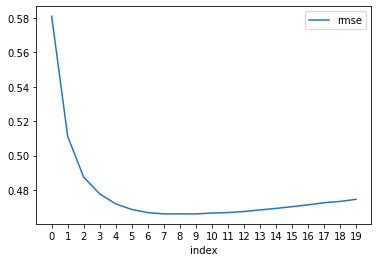

In [ ]:
#elbow curve
curve = pd.DataFrame(rmse_val,columns=['rmse']) 
curve.reset_index().plot(x='index', y='rmse')
plt.xticks(range(0,20))
plt.show()

In [ ]:
minpos = rmse_val.index(min(rmse_val))
print("Accuracy of the Linear model is:", accuracy_score[minpos])
print("RMSE of the Linear model is:", rmse_val[minpos])

Accuracy of the Linear model is: 93.40405893325806
RMSE of the Linear model is: 0.46605191980757826


In [ ]:
# Extract result
pred_org = TargetVarScalerFit.inverse_transform(result_val[minpos])

In [ ]:
# Create dataframe for representing results
combine_pred = np.append(y_test_orig , pred_org,axis=1)
df_knn_pred = pd.DataFrame(combine_pred,columns=['True result','Predicted result'])

In [ ]:
df_knn_pred.head(10)

True result  Predicted result
0    46.999996         47.400002
1    96.000000        103.500000
2   149.000000        110.000000
3    80.000000         99.500000
4    80.000000         77.599998
5    95.000000         96.400002
6   100.000000        102.400002
7    89.000000         82.500000
8    45.000000         66.900002
9    80.000000         80.500000

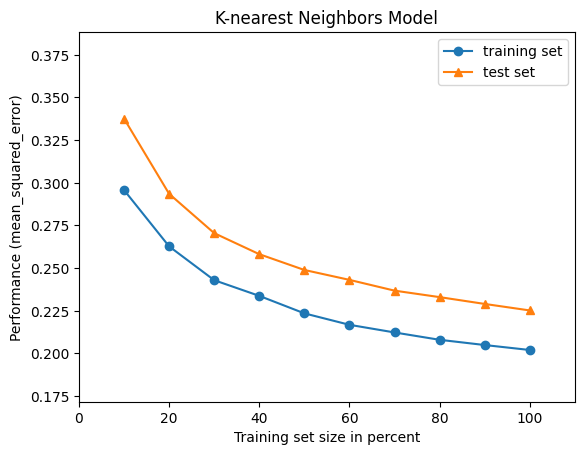

In [ ]:
plot_curves(X_train_pca,X_test_pca,y_train_pca,y_test_pca,model,"K-nearest Neighbors Model")

#### Nh·∫≠n x√©t

- M√¥ h√¨nh h·ªìi quy KNN bi·ªÉu hi·ªán kh√° t·ªët v·ªõi t·∫≠p d·ªØ li·ªáu tr√™n v·ªõi ƒë·ªô ch√≠nh x√°c t√≠nh theo MAPE l√† ~90% v√† ƒë·ªô l·ªói RMSE ch·ªâ c√≥ ~0.5.
- Ta c√≥ th·ªÉ th·∫•y Learning Curve c·ªßa m√¥ h√¨nh KNN b·ªã m·ªôt ch√∫t overfit khi m√¥ h√¨nh tr√™n bi·ªÉu hi·ªán t·∫≠p train t·ªët h∆°n t·∫≠p test. 
- Tuy nhi√™n, ch√∫ng v·∫´n c√≥ ƒëi·ªÉm chung l√† ƒë·ªô l·ªói khi t·∫≠p d·ªØ li·ªáu tƒÉng l√™n ƒë·ªÅu c√≥ d·∫•u hi·ªáu gi·∫£m d·∫ßn.

### Linear Regression

**H·ªìi quy tuy·∫øn t√≠nh(Linear Regression)** l√† m·ªôt ph∆∞∆°ng ph√°p th·ªëng k√™ ƒë·ªÉ h·ªìi quy d·ªØ li·ªáu v·ªõi bi·∫øn ph·ª• thu·ªôc c√≥ gi√° tr·ªã li√™n t·ª•c trong khi c√°c bi·∫øn ƒë·ªôc l·∫≠p c√≥ th·ªÉ c√≥ m·ªôt trong hai gi√° tr·ªã li√™n t·ª•c ho·∫∑c l√† gi√° tr·ªã ph√¢n lo·∫°i. N√≥i c√°ch kh√°c H·ªìi quy tuy·∫øn t√≠nh l√† m·ªôt ph∆∞∆°ng ph√°p ƒë·ªÉ d·ª± ƒëo√°n bi·∫øn ph·ª• thu·ªôc (Y) d·ª±a tr√™n gi√° tr·ªã c·ªßa bi·∫øn ƒë·ªôc l·∫≠p (X). N√≥ c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng cho c√°c tr∆∞·ªùng h·ª£p ch√∫ng ta mu·ªën d·ª± ƒëo√°n m·ªôt s·ªë l∆∞·ª£ng li√™n t·ª•c. V√≠ d·ª•, d·ª± ƒëo√°n giao th√¥ng ·ªü m·ªôt c·ª≠a h√†ng b√°n l·∫ª, d·ª± ƒëo√°n th·ªùi gian ng∆∞·ªùi d√πng d·ª´ng l·∫°i m·ªôt trang n√†o ƒë√≥ ho·∫∑c s·ªë trang ƒë√£ truy c·∫≠p v√†o m·ªôt website n√†o ƒë√≥ v.v...

In [ ]:
reg = LinearRegression().fit(X_train,y_train)
linear_predictions = reg.predict(X_test)

linear_predictions_orig = TargetVarScalerFit.inverse_transform(linear_predictions)

In [ ]:
print("Accuracy of the Linear model is:", str(Accuracy_Score(y_test_orig, linear_predictions_orig)))
print("RMSE of the Linear model is:", cv_rmse(reg,X_array,y_array).mean())

Accuracy of the Linear model is: 99.92962788045406
RMSE of the Linear model is: 0.0010536097709691332


In [ ]:
combine_pred = np.append(y_test_orig , linear_predictions_orig,axis=1)
df_linear_pred = pd.DataFrame(combine_pred,columns=['True result','Predicted result'])

In [ ]:
df_linear_pred.head(10)

True result  Predicted result
0    46.999996         46.975368
1    96.000000         95.935600
2   149.000000        148.962708
3    80.000000         80.028412
4    80.000000         79.960808
5    95.000000         95.083855
6   100.000000        100.014450
7    89.000000         88.982765
8    45.000000         44.968033
9    80.000000         79.944450

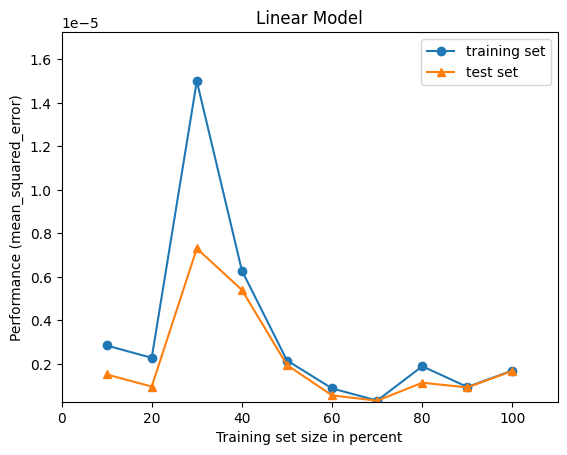

In [ ]:
plot_curves(X_train,X_test,y_train,y_test,reg,"Linear Model")

#### Nh·∫≠n x√©t
- M√¥ h√¨nh h·ªìi quy Linear Regression bi·ªÉu hi·ªán r·∫•t t·ªët v·ªõi t·∫≠p d·ªØ li·ªáu tr√™n v·ªõi ƒë·ªô ch√≠nh x√°c t√≠nh theo MAPE l√† ~99% v√† ƒë·ªô l·ªói RMSE ch·ªâ c√≥ ~0.0015.
- Ta c√≥ th·ªÉ th·∫•y Learning Curve c·ªßa m√¥ h√¨nh Linear Regression t·ª´ 60% size tr·ªü l√™n ƒë·ªÅu duy tr√¨ ·ªü m·ª©c r·∫•t th·∫•p m·∫∑c d√π c√≥ tƒÉng m·ªôt ch√∫t ·ªü 90-100%.
- M·∫∑c d√π s·ªü h·ªØu ƒë·ªô ch√≠nh x√°c cao v√† ƒë·ªô l·ªói th·∫•p, m√¥ h√¨nh kh√¥ng h·ªÅ b·ªã Overfitting. B·ªüi v√¨ Learning Curve c·ªßa t·∫≠p test lu√¥n lu√¥n c√≥ ƒë·ªô l·ªói th·∫•p h∆°n t·ª©c l√† bi·ªÉu hi·ªán t·ªët h∆°n t·∫≠p train.

### ANN Deep Learning

Artificial Neural Network (ANN) g√¥ÃÄm 3 thaÃÄnh ph√¢ÃÄn chiÃÅnh: Input layer vaÃÄ output layer chiÃâ g√¥ÃÄm 1 layer , hidden layer coÃÅ th√™Ãâ coÃÅ 1 hay nhi√™ÃÄu layer tuÃÄy vaÃÄo baÃÄi toaÃÅn cuÃ£ th√™Ãâ. ANN hoaÃ£t ƒë√¥Ã£ng theo h∆∞∆°ÃÅng m√¥ taÃâ laÃ£i caÃÅch hoaÃ£t ƒë√¥Ã£ng cuÃâa h√™Ã£ th√¢ÃÄn kinh v∆°ÃÅi caÃÅc neuron ƒë∆∞∆°Ã£c k√™ÃÅt n√¥ÃÅi v∆°ÃÅi nhau. Trong ANN, tr∆∞ÃÄ input layer thiÃÄ t√¢ÃÅt caÃâ caÃÅc node thu√¥Ã£c caÃÅc layer khaÃÅc ƒë√™ÃÄu full-connected v∆°ÃÅi caÃÅc node thu√¥Ã£c layer tr∆∞∆°ÃÅc noÃÅ. M√¥ÃÉi node thu√¥Ã£c hidden layer nh√¢Ã£n vaÃÄo ma tr√¢Ã£n ƒë√¢ÃÄu vaÃÄo t∆∞ÃÄ layer tr∆∞∆°ÃÅc vaÃÄ k√™ÃÅt h∆°Ã£p v∆°ÃÅi troÃ£ng s√¥ÃÅ ƒë√™Ãâ ra ƒë∆∞∆°Ã£c k√™ÃÅt quaÃâ. ANN c√≤n ƒë∆∞·ª£c g·ªçi l√† Feed-Forward Neural network.

L√Ω do ta ch·ªçn ANN l√† b·ªüi v√¨ ANN r·∫•t ch·∫Øc ch·∫Øn trong vi·ªác h·ªçc nh·ªØng function phi tuy·∫øn t√≠nh(non-linear). H√†m activation c·ªßa ANN c≈©ng ƒë√≥ng vai tr√≤ quan tr·ªçng khi ch√∫ng c√≥ c√°c weights cho t·ª´ng c√°c input phi tuy·∫øn t√≠nh v√†o trong m·∫°ng v√† tr·∫£ v·ªÅ m·ªôt k·∫øt qu·∫£ duy nh·∫•t. Nh·ªù v√†o ƒë√≥ m√† c√°c network c√≥ th·ªÉ h·ªçc b·∫•t k√¨ m·ªëi quan h·ªá ph·ª©c t·∫°p n√†o gi·ªØa input v√† output.

In [ ]:
ANN = Sequential()                
ANN.add(Dense(units=10, input_dim=X_train.shape[1], 
                kernel_initializer='normal', activation='relu'))
ANN.add(Dense(1, kernel_initializer='normal'))
ANN.compile(loss='mean_squared_error', optimizer={'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['optimizer_trial'])
ANN.fit(X_train, y_train,batch_size = int({'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['batch_size']),
        epochs = int({'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['epochs']), verbose=0)


ANN_predictions = ANN.predict(X_test)

ANN_predictions_org = TargetVarScalerFit.inverse_transform(ANN_predictions)

In [ ]:
print("Accuracy for the ANN model is:", str(Accuracy_Score(y_test_orig, ANN_predictions_org)))

Accuracy for the ANN model is: 95.0540542602539


In [ ]:
combine_pred = np.append(y_test_orig , ANN_predictions_org,axis=1)
df_ANN_pred = pd.DataFrame(combine_pred,columns=['True result','Predicted result'])

In [ ]:
df_ANN_pred.head(10)

True result  Predicted result
0    46.999996         45.466518
1    96.000000         93.581223
2   149.000000        143.816635
3    80.000000         78.606468
4    80.000000         77.526276
5    95.000000         90.223640
6   100.000000         98.476418
7    89.000000         86.981071
8    45.000000         45.066883
9    80.000000         78.092896

In [ ]:
ANN1 = Sequential()                
ANN1.add(Dense(units=10, input_dim=X_train.shape[1], 
                kernel_initializer='normal', activation='relu'))
ANN1.add(Dense(1, kernel_initializer='normal'))
ANN1.compile(loss='mean_squared_error', optimizer={'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['optimizer_trial'])

10942/10942 [==============================] - 8s 704us/step - loss: 33360334.0000


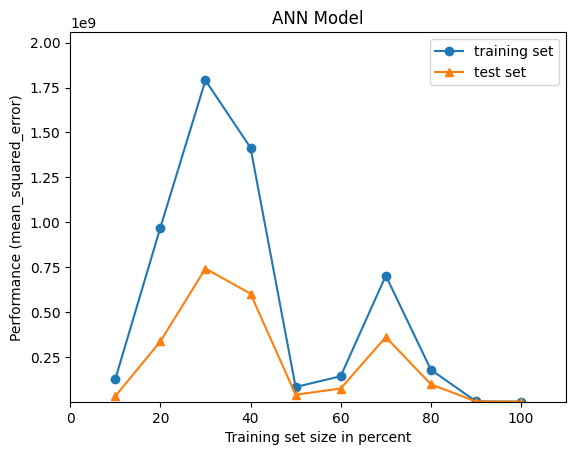

In [ ]:
plot_curves(X_train,X_test,y_train,y_test,ANN1,"ANN Model")

#### Nh·∫≠n x√©t:
- M√¥ h√¨nh h·ªçc s√¢u ANN bi·ªÉu hi·ªán r·∫•t t·ªët v·ªõi t·∫≠p d·ªØ li·ªáu tr√™n v·ªõi ƒë·ªô ch√≠nh x√°c t√≠nh theo MAPE l√† ~95%.
- Gi·ªëng v·ªõi Linear Regression, ANN c√≥ ƒë·ªô ch√≠nh x√°c cao v√† kh√¥ng h·ªÅ b·ªã Overfitting. 
- Learning Curve c·ªßa ANN c√≥ bi·ªÉu hi·ªán kh√° gi·ªëng v·ªõi Linear Regression khi ƒë·ªô l·ªói MSE c·ªßa t·∫≠p test lu√¥n th·∫•p h∆°n t·∫≠p train.
- Kh√° th√∫ v·ªã r·∫±ng t·ª´ 90% tr·ªü ƒëi, ƒë·ªô l·ªói c·ªßa ch√∫ng g·∫ßn nh∆∞ c·∫≠n 0 ch·ª©ng t·ªè m√¥ h√¨nh Deep Learning c·ªßa ta kh√° t·ªët.

## Extra

### Review Rating with Natural Language Processing (NLP)

T·∫≠p d·ªØ li·ªáu c√≥ cung c·∫•p c√°c url d·∫´n ƒë·∫øn c√°c th√¥ng tin quan tr·ªçng c·ªßa nh√† ·ªü tr√™n trang web. B√™n c·∫°nh ƒë√≥, c√°c url n√†y c√≤n cung c·∫•p c√°c comments t·ª´ nh·ªØng kh√°ch h√†ng ƒë√£ s·ª≠ d·ª•ng qua d·ªãch v·ª• n√™n ta c√≥ th·ªÉ tr√≠ch l·ªçc c√°c d·ªØ li·ªáu h·ªØu √≠ch c≈©ng nh∆∞ x√¢y d·ª±ng h·ªá th·ªëng nh·ªè v·ªÅ review rating th√¥ng qua c√°c comment n√†y. Hai m√¥ h√¨nh ch√≠nh m√† ta s·∫Ω s·ª≠ d·ª•ng l√† **Vader** v√† **RoBERTa**.



Ta s·∫Ω s·ª≠ d·ª•ng c√¥ng c·ª• Airbnb Scraper web t·ª´ Apify Store (https://console.apify.com/actors/GsNzxEKzE2vQ5d9HN) ƒë·ªÉ scrape d·ªØ li·ªáu t·ª´ 10 ph√≤ng ng·∫´u nhi√™n trong b·∫£ng d·ªØ li·ªáu.

In [65]:
df_reviews = pd.read_csv("listing_url_samples.csv")
matching = [s for s in df_reviews.columns if "comments" in s]
review_info = [['primaryHost/id','primaryHost/firstName','url']]
review_info.append(matching)
review_info = [item for sublist in review_info for item in sublist]
df_reviews = df_reviews[review_info]

normal_reviews = []
localized_reviews = []
for i in range(0,50):
    normal_review = 'reviews/' + str(i) + '/comments'
    normal_reviews.append(normal_review)
    local_review = 'reviews/' + str(i) + '/localizedReview/comments'
    if local_review in review_info:
        localized_reviews.append(re.findall(r'\d+', local_review))

localized_reviews = [item for sublist in localized_reviews for item in sublist]
for i in localized_reviews:
    nor_review = df_reviews['reviews/' + str(i) + '/comments']
    local_review = df_reviews['reviews/' + str(i) + '/localizedReview/comments']
    for i in range(0,len(nor_review)):
        if local_review[i] is not np.nan:
            nor_review[i] = local_review[i]

review_info = [['primaryHost/id','primaryHost/firstName','url']]
review_info.append(normal_reviews)
review_info = [item for sublist in review_info for item in sublist]
df_reviews = df_reviews[review_info]

df_reviews

C:\Users\HP\AppData\Local\Temp\ipykernel_15300\1173735845.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nor_review[i] = local_review[i]


primaryHost/id primaryHost/firstName  \
0        59269534              Nicoline   
1        11298369               Maartje   
2        44818142                 Peter   
3        13744875                 Jerry   
4        59054356                Jeroen   
5        35491133                 Karin   
6         1093398              Victoria   
7         5435558                 Karen   
8        21679611                   Tom   
9        55288093                 Petra   

                                     url  \
0  https://www.airbnb.com/rooms/13932749   
1   https://www.airbnb.com/rooms/6057672   
2  https://www.airbnb.com/rooms/16422012   
3  https://www.airbnb.com/rooms/11264941   
4  https://www.airbnb.com/rooms/12251301   
5   https://www.airbnb.com/rooms/6833081   
6  https://www.airbnb.com/rooms/18297091   
7  https://www.airbnb.com/rooms/17820658   
8   https://www.airbnb.com/rooms/4178600   
9  https://www.airbnb.com/rooms/11178448   

                                  reviews/0/comments  \
0  Nicoline‚Äôs took time out of her work day to le...   
1  Maartje‚Äôs appartement is lovely, located in a ...   
2  I really liked this stylish room.<br/>We could...   
3  Very clean and bright! Very close to both the ...   
4  This is the best apartments I've ever stayed i...   
5  We felt as if we were staying at a very good f...   
6  Amazing cute stay 5' walk from Midi. Very well...   
7  Great stay. Lovely big space. Comfortable bed....   
8  We enjoyed our stay in Tom‚Äôs cosy and beautifu...   
9  If you're looking for a place to stay in Amste...   

                                  reviews/1/comments  \
0                   Thank you for being a great host   
1  Spacious and very clean apartment in the heart...   
2  The appartment isreally nice, brigth and clean...   
3  Jerry was very welcoming and made sure to answ...   
4  Great apartment, quiet zone, close to the city...   
5  nice apartment, nice place, bathroom and bedro...   
6   nice place , very close to public transportation   
7  Had a great stay! Very clean and the bed was r...   
8  Staying at Tom's place was an absolute pleasur...   
9  We loved our stay! Everything was so clean and...   

                                  reviews/2/comments  \
0  Fabulous place to stay. Sets you up to have a ...   
1  Maartje‚Äòs apartment seems like an oasis in thi...   
2  Great location, Peter wasn't there to welcome ...   
3  Great flat for a couple, really enjoyed our tr...   
4  our stay was great! Jeroen is so communicative...   
5  We had a really nice stay at this place. Every...   
6  It‚Äôs a beautiful apartment. Very thoughtful ar...   
7  I loved this place a lot! <br/>Karen was helpf...   
8  host: Tom is very friendly and happy to help. ...   
9  It was such a pleasant surprise that when we a...   

                                  reviews/3/comments  \
0  Nicoline's apartment is spacious and not too f...   
1  Great stay! The space is really nice with a be...   
2  Great apartment about 10 mins walk from the ma...   
3  Our stay at Jerry's house was really good! The...   
4  Really well situated apartment, with all the a...   
5  A nice option in Antwerp, Karin was very recep...   
6  Amazing place! Very close to the city centre e...   
7            Amazing location and lovely apartment !   
8  A great location and full amenities with a sup...   
9  Great location, just off a main thoroughfare w...   

                                  reviews/4/comments  \
0  Great place to stay in Amsterdam! Nice apartme...   
1  Lovely clean and bright apartment. Great outsi...   
2                               Very nice apartment!   
3  Jerry‚Äôs apartment is in a great location just ...   
4  The appointment is one of best places I ever s...   
5  I stayed at Karin‚Äôs place for a couple of week...   
6  It was a great experience, Victoria was extrem...   
7  We had an excellent stay at Karen‚Äôs place. The...   
8  The place is perfect, very clean and Tom is al...   


In [66]:
first = df_reviews[normal_reviews].T[0]
total = df_reviews[normal_reviews].T

# Vader Model
sia = SentimentIntensityAnalyzer()

# Roberta Model 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [67]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [68]:
total_vader = []
total_roberta = []
for list_reviews in total:
    vader_scores = []
    roberta_scores = []
    for review in total[list_reviews]:
        if review is not np.nan:
            try:
                vader_score = sia.polarity_scores(review)
                roberta_score = polarity_scores_roberta(review)
                vader_scores.append(vader_score['compound'])
                roberta_scores.append(roberta_score['roberta_pos'])
                print(review)
                print(vader_score)
                print(roberta_score,"\n")
            except RuntimeError:
                print(f'Broke')
    total_vader.append(vader_scores)
    total_roberta.append(roberta_scores)

Nicoline‚Äôs took time out of her work day to let me check in a hour early. House is perfect as you expect from the pictures. Not a complaint about her house, but August in Amsterdam is hot, bring a fan. <br/><br/>Thanks for everything beautiful Spacious home walking distance to most stores.
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.9021}
{'roberta_neg': 0.0037486195, 'roberta_neu': 0.026547926, 'roberta_pos': 0.9697033} 

Thank you for being a great host
{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.765}
{'roberta_neg': 0.001959342, 'roberta_neu': 0.008582419, 'roberta_pos': 0.9894582} 

Fabulous place to stay. Sets you up to have a lovely, relaxing time in the city.
{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.886}
{'roberta_neg': 0.0019980837, 'roberta_neu': 0.019073633, 'roberta_pos': 0.97892815} 

Nicoline's apartment is spacious and not too far from the city! Perfect for a couple looking to stay somewhere they can cook and relax. The apartment has 

In [72]:
def get_review_rating(total):
    list_means = []
    for i in total:
        # Rate by 5
        means = np.mean(i) / 2 * 10
        list_means.append(means)
    return list_means

vader_rating = get_review_rating(total_vader)
roberta_rating = get_review_rating(total_roberta)

In [73]:
df_reviews['vader_rating'] = vader_rating
df_reviews['roberta_rating'] = roberta_rating

In [74]:
df_reviews[['primaryHost/id','primaryHost/firstName','url','vader_rating','roberta_rating']]

primaryHost/id primaryHost/firstName  \
0        59269534              Nicoline   
1        11298369               Maartje   
2        44818142                 Peter   
3        13744875                 Jerry   
4        59054356                Jeroen   
5        35491133                 Karin   
6         1093398              Victoria   
7         5435558                 Karen   
8        21679611                   Tom   
9        55288093                 Petra   

                                     url  vader_rating  roberta_rating  
0  https://www.airbnb.com/rooms/13932749      4.296654        4.928254  
1   https://www.airbnb.com/rooms/6057672      4.349750        4.922335  
2  https://www.airbnb.com/rooms/16422012      4.015238        4.829367  
3  https://www.airbnb.com/rooms/11264941      4.322879        4.818305  
4  https://www.airbnb.com/rooms/12251301      4.426582        4.817976  
5   https://www.airbnb.com/rooms/6833081      3.281406        4.262580  
6  https://www.airbnb.com/rooms/18297091      4.014900        4.693665  
7  https://www.airbnb.com/rooms/17820658      4.465320        4.851689  
8   https://www.airbnb.com/rooms/4178600      4.313100        4.798855  
9  https://www.airbnb.com/rooms/11178448      4.470450        4.897381

## Reference
- https://bnbfacts.com/how-airbnb-category-ratings-affect-overall-rating/
- https://kabir-isak.medium.com/airbnb-seattle-data-analysis-2e01f2559614
- https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
- https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
- https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3
- https://viblo.asia/p/tong-quan-ve-artificial-neural-network-1VgZvwYrlAw
- https://en.wikipedia.org/wiki/Artificial_neural_network
- https://seaborn.pydata.org/generated/seaborn.regplot.html
- https://stackoverflow.com/questions/63892337/how-to-rotate-seaborn-heatmap-in-python
- https://samuelndungula.medium.com/sentiment-analysis-using-vader-and-roberta-5279ba312d70